In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
crop=pd.read_csv("crop_production.csv")

In [3]:
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area (in Hectares),Production (in Tonnes)
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
crop['District_Name']=crop['District_Name'].str.title()

In [5]:
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area (in Hectares),Production (in Tonnes)
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
crop.describe()

,Crop_Year,Area (in Hectares),Production (in Tonnes)
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
states=list(crop['State_Name'].unique())
states

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir ',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana ',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [8]:
len(crop['District_Name'].unique())

646

In [9]:
crop['Season']=crop['Season'].str.strip()

In [10]:
crop['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [11]:
len(crop['Crop'].unique())

124

In [12]:
import numpy as np
crop=crop[crop['Area (in Hectares)']<np.percentile(crop['Area (in Hectares)'],99)]
crop=crop[crop['Area (in Hectares)']>0]
crop=crop[crop['Area (in Hectares)']>np.percentile(crop['Area (in Hectares)'],1)]

In [13]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area (in Hectares),Production (in Tonnes)
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246085,West Bengal,Purulia,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,Purulia,2014,Summer,Rice,306.0,801.0
246087,West Bengal,Purulia,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,Purulia,2014,Whole Year,Sugarcane,324.0,16250.0


In [14]:
crop=crop[crop['Production (in Tonnes)']>0]
crop=crop[crop['Production (in Tonnes)']<np.percentile(crop['Production (in Tonnes)'],99)]
crop=crop[crop['Production (in Tonnes)']>np.percentile(crop['Production (in Tonnes)'],1)]

In [15]:
del crop['Crop_Year']
crop.to_csv('Processed_Yield.csv')

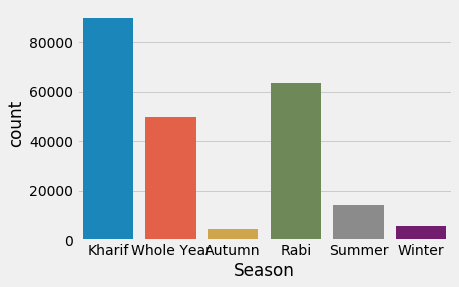

In [16]:
sns.countplot(crop['Season'])

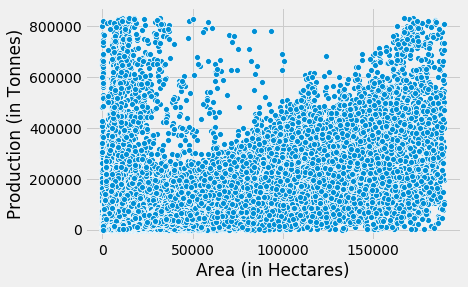

In [17]:
sns.scatterplot(crop['Area (in Hectares)'],crop['Production (in Tonnes)'])

In [18]:
from category_encoders import TargetEncoder

In [19]:
enc=TargetEncoder().fit(crop[['State_Name','District_Name','Season','Crop']],
                  crop['Production (in Tonnes)'])

In [20]:
enc

TargetEncoder(cols=['State_Name', 'District_Name', 'Season', 'Crop'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [21]:
import joblib

In [22]:
joblib.dump(enc,'encoder.pkl')

['encoder.pkl']

In [23]:
crop[['State_Name','District_Name','Season','Crop']]=enc.transform(crop[['State_Name','District_Name','Season','Crop']])

In [24]:
crop

,State_Name,District_Name,Season,Crop,Area (in Hectares),Production (in Tonnes)
0,2518.792442,431.356949,19581.854677,13519.281502,1254.0,2000.0
2,2518.792442,431.356949,19581.854677,82453.055193,102.0,321.0
3,2518.792442,431.356949,25084.265178,46893.161299,176.0,641.0
4,2518.792442,431.356949,25084.265178,2513.477722,720.0,165.0
6,2518.792442,431.356949,25084.265178,3168.942062,36.0,100.0
...,...,...,...,...,...,...
246085,32959.704925,3643.511419,11156.300989,19927.386792,325.0,2039.0
246086,32959.704925,3643.511419,11156.300989,82453.055193,306.0,801.0
246087,32959.704925,3643.511419,11156.300989,1303.281339,627.0,463.0
246088,32959.704925,3643.511419,25084.265178,111425.913929,324.0,16250.0


In [25]:
from sklearn.model_selection import train_test_split
x=crop.drop('Production (in Tonnes)',axis=1)
y=crop['Production (in Tonnes)']
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [26]:
xtrain

,State_Name,District_Name,Season,Crop,Area (in Hectares)
116799,16712.384005,9718.779279,22212.141104,2006.613008,18009.0
134118,24712.125891,17448.004435,19581.854677,2434.236456,1700.0
34595,15539.062455,9578.946607,22212.141104,10450.049920,3111.0
207879,30710.086236,48193.657471,22212.141104,10450.049920,736.0
85884,18459.854074,33598.705794,22212.141104,10450.049920,218.0
...,...,...,...,...,...
54822,4701.096893,3908.066787,22212.141104,2356.741019,124.0
120224,16712.384005,17980.506234,19581.854677,5461.743529,34.0
25304,12742.835159,9738.529963,22212.141104,1830.898499,34.0
63840,29862.393928,41293.900000,19581.854677,2017.055612,100.0


In [27]:
xtest

,State_Name,District_Name,Season,Crop,Area (in Hectares)
125357,24712.125891,20038.702079,22212.141104,1623.913282,600.0
179691,33059.446298,33271.402326,25084.265178,1195.461000,105.0
69418,69062.686145,10379.723502,19581.854677,19927.386792,9458.0
153772,10472.419227,4274.024821,25084.265178,2800.784503,1722.0
8157,26339.910344,8382.000000,19581.854677,4876.464483,2874.0
...,...,...,...,...,...
92084,18459.854074,16821.496207,22212.141104,13309.214192,45576.0
225325,30710.086236,34307.595618,19581.854677,8933.676700,2866.0
155551,10472.419227,17087.771894,25084.265178,2577.051709,2907.0
5559,26339.910344,30675.543004,19581.854677,82453.055193,72100.0


In [28]:
ytrain

116799     6053.0
134118      900.0
34595      5615.0
207879      467.0
85884        47.0
           ...   
54822        25.0
120224      115.0
25304        13.0
63840       100.0
899       68614.0
Name: Production (in Tonnes), Length: 170983, dtype: float64

In [29]:
ytest

125357       200.0
179691        32.0
69418      18000.0
153772      1290.0
8157         868.0
            ...   
92084      26763.0
225325      1476.0
155551      6976.0
5559      206700.0
13124       3378.0
Name: Production (in Tonnes), Length: 56995, dtype: float64

In [30]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=300,max_depth=10,learning_rate=0.05,gamma=0.5,reg_lambda=0.1).fit(xtrain,ytrain)

In [31]:
pred=model.predict(xtest)

In [32]:
result=pd.DataFrame()
result['Actual']=ytest
result['Predicted']=pred

In [33]:
result.sort_index(inplace=True)

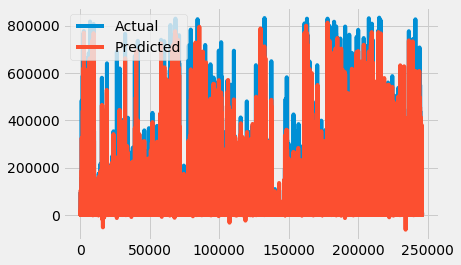

In [34]:
result.plot()

In [35]:
result.corr()

,Actual,Predicted
Actual,1.000000,0.960379
Predicted,0.960379,1.000000


In [36]:
from sklearn.metrics import mean_absolute_error as mae
mae(ytest,pred)

5038.415420067517

In [37]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9223268063733979

In [38]:
from sklearn.metrics import median_absolute_error as mae
mae(ytest,pred)

327.4103698730469

In [39]:
joblib.dump(model,'yield_predictor.pkl')

['yield_predictor.pkl']